# Video Search with Azure Computer Vision 4 (Florence)
## 1. Extracting frames from the video

![image](logo.jpg)

In [1]:
import cv2
import glob
import os
import time
import requests
import sys
import shutil

from azure import video_details

from dotenv import load_dotenv
from IPython.display import Image
from PIL import Image as PILImage
from IPython.display import Video

In [2]:
print("This notebook was made with Python 3.10.9")
sys.version

This notebook was made with Python 3.10.9


'3.10.9 (main, Jan 11 2023, 15:21:40) [GCC 11.2.0]'

## 1. Directories creation

In [3]:
HOME_DIR = os.getcwd()
HOME_DIR

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow8/code/Users/seretkow/florence/Video Search'

In [4]:
VIDEO_DIR = "videos"

if os.path.exists(VIDEO_DIR):
    shutil.rmtree(VIDEO_DIR)

print("Creating directory")
os.makedirs(VIDEO_DIR, exist_ok=True)
print("Done")

Creating directory
Done


In [5]:
FRAMES_DIR = "frames"

if os.path.exists(FRAMES_DIR):
    print("Deleting the frames dir...")
    shutil.rmtree(FRAMES_DIR)
    print("Done")

print("Creating directory")
os.makedirs(FRAMES_DIR, exist_ok=True)
print("Done")

Deleting the frames dir...
Done
Creating directory
Done


## 2. Video file

In [7]:
os.chdir(VIDEO_DIR)

!wget https://www.dropbox.com/s/fa7r6v15hdv978h/paris.mp4

os.chdir(HOME_DIR)

--2023-05-12 07:59:48--  https://www.dropbox.com/s/fa7r6v15hdv978h/paris.mp4
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fa7r6v15hdv978h/paris.mp4 [following]
--2023-05-12 07:59:48--  https://www.dropbox.com/s/raw/fa7r6v15hdv978h/paris.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5c305efaad76e017b8ec099d18.dl.dropboxusercontent.com/cd/0/inline/B75XpD4ZlPdkTCZAJcChkat8wPDQhGTbgT0S34GNv4SD59HZCVcpe8W0jX2NUAhsabXsGsl2vAtBoPFcpHGhwZZaPCZ6iefDoHooNt914rnjbD7YOOxxm-PEUD093FLkccPiF2GWaUt2OfKvcN85R4yf4IBqOSagdyeLA_yA9LF8Gg/file# [following]
--2023-05-12 07:59:49--  https://uc5c305efaad76e017b8ec099d18.dl.dropboxusercontent.com/cd/0/inline/B75XpD4ZlPdkTCZAJcChkat8wPDQhGTbgT0S34GNv4SD59HZCVcpe8W0jX2NUAhsabXsGsl2vAtBoPFcpHGhwZ

In [8]:
!ls $VIDEO_DIR/paris.mp4 -lh

-rwxrwxrwx 1 root root 375M May 12 07:59 videos/paris.mp4


In [9]:
video_extensions = (".mp4", ".avi", ".mpg")

videos_list = [
    os.path.join(VIDEO_DIR, f)
    for f in os.listdir(VIDEO_DIR)
    if os.path.splitext(f)[1].lower() in video_extensions
]

videos_list

['videos/paris.mp4']

In [10]:
video_file = videos_list[0]

Video(video_file, width=860)

## 3. Extracting the frames from the video

In [11]:
duration, fps, nbframes = video_details(video_file)

Video filename: videos/paris.mp4
Video duration in secs = 1451.79 seconds
Video duration in mins = 24.20 mins
Frames per second: 29
Total number of frames: 42102


In [12]:
nbsecs = 1  # get 1 frame each second of the video

frame_count = 0
frames_count = 1000
jpg_quality = 100

video = cv2.VideoCapture(video_file)
print("Extracting frames from the video\n")

while True:
    ret, frame = video.read()

    if not ret:
        break

    if frame_count % (fps * nbsecs) == 0:
        cv2.imwrite(
            FRAMES_DIR + "/" + f"frame_{frame_count // (fps * nbsecs):09}.jpg",
            frame,
            [cv2.IMWRITE_JPEG_QUALITY, jpg_quality],
        )

    if frame_count % frames_count == 0:
        print("Reading frames:", frame_count)

    frame_count += 1

print("\nDone")
print("Number of extracted frames =", len(os.listdir(FRAMES_DIR)))

Extracting frames from the video

Reading frames: 0
Reading frames: 1000
Reading frames: 2000
Reading frames: 3000
Reading frames: 4000
Reading frames: 5000
Reading frames: 6000
Reading frames: 7000
Reading frames: 8000
Reading frames: 9000
Reading frames: 10000
Reading frames: 11000
Reading frames: 12000
Reading frames: 13000
Reading frames: 14000
Reading frames: 15000
Reading frames: 16000
Reading frames: 17000
Reading frames: 18000
Reading frames: 19000
Reading frames: 20000
Reading frames: 21000
Reading frames: 22000
Reading frames: 23000
Reading frames: 24000
Reading frames: 25000
Reading frames: 26000
Reading frames: 27000
Reading frames: 28000
Reading frames: 29000
Reading frames: 30000
Reading frames: 31000
Reading frames: 32000
Reading frames: 33000
Reading frames: 34000
Reading frames: 35000
Reading frames: 36000
Reading frames: 37000
Reading frames: 38000
Reading frames: 39000
Reading frames: 40000
Reading frames: 41000
Reading frames: 42000

Done
Number of extracted frames 

In [13]:
frames = [file for file in glob.glob(FRAMES_DIR + "/*.jpg")]
print("Number of frames:", len(frames))

Number of frames: 1452


In [14]:
frames[:10]

['frames/frame_000000000.jpg',
 'frames/frame_000000001.jpg',
 'frames/frame_000000002.jpg',
 'frames/frame_000000003.jpg',
 'frames/frame_000000004.jpg',
 'frames/frame_000000005.jpg',
 'frames/frame_000000006.jpg',
 'frames/frame_000000007.jpg',
 'frames/frame_000000008.jpg',
 'frames/frame_000000009.jpg']

## 4. Azure Computer Vision 4 (florence)

> You need to replace in the azure.env file the key and endpoint values with your Azure Computer Vision service

In [15]:
!ls azure.env -lh

-rwxrwxrwx 1 root root 166 May  4 07:55 azure.env


In [16]:
# Loading the key and endpoint for Azure Computer Vision 4

load_dotenv("azure.env")

azure_cv_key = os.getenv("azure_cv_key")
azure_cv_endpoint = os.getenv("azure_cv_endpoint")

In [17]:
features = "&features=tags,read,caption,denseCaptions,smartCrops,objects,people"

url = (
    azure_cv_endpoint
    + "/computervision/imageanalysis:analyze?api-version=2023-02-01-preview"
    + features
)

headers = {
    "Content-type": "application/octet-stream",
    "Ocp-Apim-Subscription-Key": azure_cv_key,
}

## 5. Testing Azure Computer Vision on a single frame

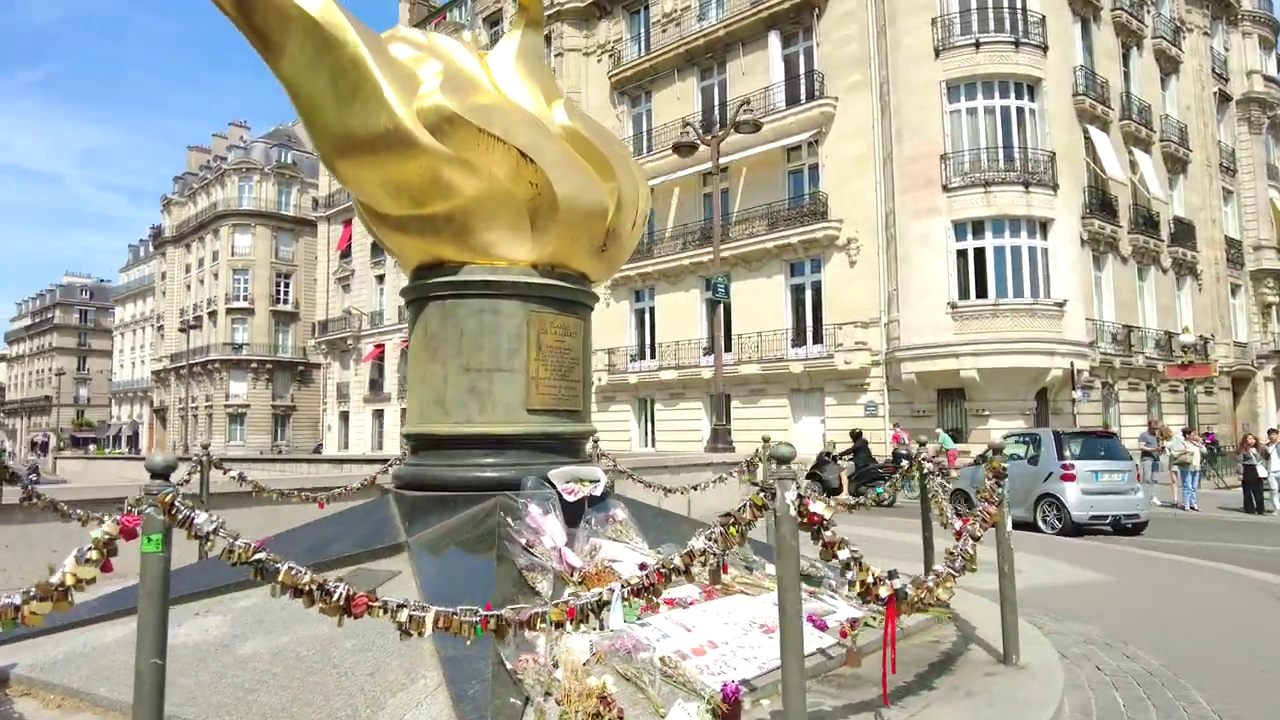

In [18]:
frameid = 700

Image(filename=frames[frameid], width=640)

In [19]:
with open(frames[frameid], "rb") as file:
    img = file.read()
        
results = requests.post(url, data=img, headers=headers)

In [20]:
results.json()

{'captionResult': {'text': 'a statue with a flame and a bunch of keys on it',
  'confidence': 0.257158488035202},
 'objectsResult': {'values': [{'boundingBox': {'x': 940,
     'y': 427,
     'w': 221,
     'h': 113},
    'tags': [{'name': 'car', 'confidence': 0.537}]},
   {'boundingBox': {'x': 543, 'y': 9, 'w': 716, 'h': 453},
    'tags': [{'name': 'building', 'confidence': 0.559}]}]},
 'readResult': {'stringIndexType': 'TextElements',
  'content': '',
  'pages': [{'height': 720.0,
    'width': 1280.0,
    'angle': 0.0,
    'pageNumber': 1,
    'words': [],
    'spans': [{'offset': 0, 'length': 0}],
    'lines': []}],
  'styles': [],
  'modelVersion': '2022-04-30'},
 'denseCaptionsResult': {'values': [{'text': 'a large metal object with a yellow top',
    'confidence': 0.3042483627796173,
    'boundingBox': {'x': 383, 'y': 261, 'w': 218, 'h': 227}},
   {'text': 'a bunch of keys on a rope',
    'confidence': 0.35171929001808167,
    'boundingBox': {'x': 110, 'y': 438, 'w': 923, 'h': 274

In [21]:
caption = results.json()["captionResult"]
caption

{'text': 'a statue with a flame and a bunch of keys on it',
 'confidence': 0.257158488035202}

In [22]:
ocr = results.json()["readResult"]
ocr

{'stringIndexType': 'TextElements',
 'content': '',
 'pages': [{'height': 720.0,
   'width': 1280.0,
   'angle': 0.0,
   'pageNumber': 1,
   'words': [],
   'spans': [{'offset': 0, 'length': 0}],
   'lines': []}],
 'styles': [],
 'modelVersion': '2022-04-30'}

In [23]:
densecaptions = results.json()["denseCaptionsResult"]
densecaptions

{'values': [{'text': 'a large metal object with a yellow top',
   'confidence': 0.3042483627796173,
   'boundingBox': {'x': 383, 'y': 261, 'w': 218, 'h': 227}},
  {'text': 'a bunch of keys on a rope',
   'confidence': 0.35171929001808167,
   'boundingBox': {'x': 110, 'y': 438, 'w': 923, 'h': 274}},
  {'text': 'a large gold statue in front of a building',
   'confidence': 0.4616871178150177,
   'boundingBox': {'x': 199, 'y': 0, 'w': 447, 'h': 283}},
  {'text': 'a car parked on the side of the road',
   'confidence': 0.48398178815841675,
   'boundingBox': {'x': 941, 'y': 420, 'w': 210, 'h': 115}},
  {'text': 'a statue with a flame and a bunch of keys on it',
   'confidence': 0.257158488035202,
   'boundingBox': {'x': 0, 'y': 0, 'w': 1280, 'h': 720}},
  {'text': 'a close up of a menu',
   'confidence': 0.45667514204978943,
   'boundingBox': {'x': 520, 'y': 305, 'w': 66, 'h': 104}},
  {'text': 'a street sign on a pole',
   'confidence': 0.49382877349853516,
   'boundingBox': {'x': 655, 'y'

In [24]:
tags = results.json()["tagsResult"]
tags

{'values': [{'name': 'outdoor', 'confidence': 0.9933167099952698},
  {'name': 'sky', 'confidence': 0.9271664023399353},
  {'name': 'car', 'confidence': 0.9023517370223999},
  {'name': 'street', 'confidence': 0.8648040294647217},
  {'name': 'road', 'confidence': 0.8345917463302612},
  {'name': 'building', 'confidence': 0.7888261079788208},
  {'name': 'person', 'confidence': 0.6807100772857666},
  {'name': 'statue', 'confidence': 0.6549285650253296},
  {'name': 'city', 'confidence': 0.6052477955818176},
  {'name': 'art', 'confidence': 0.49809926748275757},
  {'name': 'parade', 'confidence': 0.46842265129089355}]}

In [25]:
crop = results.json()["smartCropsResult"]
crop

{'values': [{'aspectRatio': 1.78,
   'boundingBox': {'x': 53, 'y': 30, 'w': 1174, 'h': 660}}]}

In [26]:
objects =results.json()["objectsResult"]
objects

{'values': [{'boundingBox': {'x': 940, 'y': 427, 'w': 221, 'h': 113},
   'tags': [{'name': 'car', 'confidence': 0.537}]},
  {'boundingBox': {'x': 543, 'y': 9, 'w': 716, 'h': 453},
   'tags': [{'name': 'building', 'confidence': 0.559}]}]}

In [27]:
people = results.json()["peopleResult"]
people

{'values': [{'boundingBox': {'x': 1236, 'y': 431, 'w': 34, 'h': 83},
   'confidence': 0.771651566028595},
  {'boundingBox': {'x': 1170, 'y': 424, 'w': 36, 'h': 88},
   'confidence': 0.7104591727256775},
  {'boundingBox': {'x': 1137, 'y': 415, 'w': 28, 'h': 72},
   'confidence': 0.6938953399658203},
  {'boundingBox': {'x': 1263, 'y': 426, 'w': 15, 'h': 90},
   'confidence': 0.6420554518699646},
  {'boundingBox': {'x': 835, 'y': 426, 'w': 42, 'h': 74},
   'confidence': 0.6245633363723755},
  {'boundingBox': {'x': 888, 'y': 420, 'w': 27, 'h': 46},
   'confidence': 0.43977364897727966},
  {'boundingBox': {'x': 932, 'y': 424, 'w': 25, 'h': 43},
   'confidence': 0.29459789395332336},
  {'boundingBox': {'x': 1201, 'y': 424, 'w': 21, 'h': 48},
   'confidence': 0.20339126884937286},
  {'boundingBox': {'x': 22, 'y': 460, 'w': 20, 'h': 41},
   'confidence': 0.017067907378077507},
  {'boundingBox': {'x': 1157, 'y': 420, 'w': 18, 'h': 35},
   'confidence': 0.01702696643769741},
  {'boundingBox': {'

> In the next notebook we will do some image analysis